In [95]:
from bs4 import BeautifulSoup
import requests
import re 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm_notebook as tqdm 
import matplotlib.pyplot as plt

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

driver = webdriver.Safari()
driver.get('https://www.espn.com/nba/stats/player/_/table/offensive/sort/avgPoints/dir/desc')
driver.implicitly_wait(10)
cookies = driver.find_element_by_id("onetrust-accept-btn-handler")
driver.execute_script('arguments[0].click();',cookies)

driver.implicitly_wait(10)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)");



try:
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//a[contains(text(),'Show More')]"))
    )
    driver.execute_script("arguments[0].click();", element)
finally:
    driver.quit()


#for x in range(len(more_buttons)):
    #if more_buttons[x].is_displayed():
        #driver.execute_script("arguments[0].click();", more_buttons[x])
        #time.sleep(1)
page_source = driver.page_source

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=49552): Max retries exceeded with url: /session/82F0E7E8-4521-4254-8A2B-AE5A0740CECF/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f86616b4b50>: Failed to establish a new connection: [Errno 61] Connection refused'))

### NBA Offensive Player Stats

soup = BeautifulSoup(page_source, 'lxml')


In [96]:
main_link = 'https://www.espn.com/nba/stats/player/_/table/offensive/sort/avgPoints/dir/desc'
user_agent = {'User-agent': ''}
response = requests.get(main_link,timeout = 15, headers = user_agent,)

In [97]:
response.status_code

200

In [98]:
soup = BeautifulSoup(response.content, 'html.parser')
elements = soup.find_all('div',{'class':'page-container cf'})

In [99]:
len(elements)

1

In [100]:
elements = soup.find_all('div',{'class':'page-container cf'})

In [101]:
elements

[<div class="page-container cf"><div class="layout is-full"><div class="layout__column layout__column--1"><section class="Card"><div class="Wrapper Card__Content"><div class="flex justify-between mt3 mb5 items-center"><h1 class="headline headline__h1 dib">NBA Player Stats 2020-21</h1><div class="dropdown dropdown--md h-100 pageHeading__team-stats-dropdown bp-mobile"><svg aria-hidden="true" class="dropdown__arrow icon__svg" viewbox="0 0 24 24"><use xlink:href="#icon__caret__down"></use></svg><select class="dropdown__select" name="1631028646659::c4f0000::3ad6624c:ee6e:17a3:0b57:91c1d2790a6e" style="text-overflow:ellipsis;overflow:hidden;width:126px"><option class="dropdown__option" data-url="#" hidden="" value="Selected">Team Statistics</option><option class="dropdown__option" data-url="/nba/team/stats/_/name/atl/atlanta-hawks" value="1">Atlanta Hawks</option><option class="dropdown__option" data-url="/nba/team/stats/_/name/bos/boston-celtics" value="2">Boston Celtics</option><option cla

## Let's try to get the names first

In [102]:
elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find('table',{'class':'Table Table--align-right Table--fixed Table--fixed-left'}).find_all('tbody',{'class':'Table__TBODY'})[0].find_all('td',{'class':'Table__TD'})[3].find('a').get_text()

'Bradley Beal'

In [103]:
elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find('table',{'class':'Table Table--align-right Table--fixed Table--fixed-left'}).find_all('tbody',{'class':'Table__TBODY'})[0].find_all('td',{'class':'Table__TD'})[4]

<td class="Table__TD">3</td>

### * The even numbered calls return a class and hence our loop should only get the odd numbered calls

In [104]:
len(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find('table',{'class':'Table Table--align-right Table--fixed Table--fixed-left'}).find_all('tbody',{'class':'Table__TBODY'})[0].find_all('td',{'class':'Table__TD'}))

100

In [105]:
#first 50 names
names50 = []
for i in range(1,100,2):#We used a step of 2 as we saw * above  
    names50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find('table',{'class':'Table Table--align-right Table--fixed Table--fixed-left'}).find_all('tbody',{'class':'Table__TBODY'})[0].find_all('td',{'class':'Table__TD'})[i].find('a').get_text())

In [106]:
names50

['Stephen Curry',
 'Bradley Beal',
 'Damian Lillard',
 'Joel Embiid',
 'Giannis Antetokounmpo',
 'Luka Doncic',
 'Zach LaVine',
 'Zion Williamson',
 'Kevin Durant',
 'Kyrie Irving',
 'Jayson Tatum',
 'Donovan Mitchell',
 'Nikola Jokic',
 'Devin Booker',
 'Trae Young',
 "De'Aaron Fox",
 'LeBron James',
 'Kawhi Leonard',
 'Karl-Anthony Towns',
 'Jaylen Brown',
 'James Harden',
 'Collin Sexton',
 'Julius Randle',
 'Brandon Ingram',
 'Shai Gilgeous-Alexander',
 'Nikola Vucevic',
 'Paul George',
 'CJ McCollum',
 'Jerami Grant',
 'Russell Westbrook',
 'Anthony Davis',
 'DeMar DeRozan',
 'Jimmy Butler',
 'Pascal Siakam',
 'Jamal Murray',
 'Malcolm Brogdon',
 'Christian Wood',
 'John Wall',
 'Terry Rozier',
 'Khris Middleton',
 'Domantas Sabonis',
 'Caris LeVert',
 'Kristaps Porzingis',
 'Victor Oladipo',
 'Gordon Hayward',
 'Fred VanVleet',
 'Malik Beasley',
 'Tobias Harris',
 'Anthony Edwards',
 'Kemba Walker']

## Now we will get the rest information from the table

### 1. Player Positions

In [107]:
elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('div',{'class':'position'})[0].get_text()

'PG'

In [108]:
#first 50 positions
positions50 = []
for i in range(0,50): 
    positions50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('div',{'class':'position'})[i].get_text())

In [109]:
positions50

['PG',
 'SG',
 'PG',
 'C',
 'PF',
 'PG',
 'SG',
 'PF',
 'PF',
 'PG',
 'SF',
 'SG',
 'C',
 'SG',
 'PG',
 'PG',
 'SF',
 'SF',
 'C',
 'SG',
 'SG',
 'PG',
 'PF',
 'SF',
 'SG',
 'C',
 'SG',
 'SG',
 'SF',
 'PG',
 'PF',
 'SF',
 'SF',
 'PF',
 'PG',
 'PG',
 'C',
 'PG',
 'SG',
 'SF',
 'PF',
 'SG',
 'C',
 'SG',
 'SF',
 'SG',
 'SG',
 'PF',
 'SF',
 'PG']

### 2.  Games Played (GP)

In [110]:
a = elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})

In [111]:
a

[<td class="position Table__TD"><div class="position">PG</div></td>,
 <td class="Table__TD">63</td>,
 <td class="Table__TD">34.2</td>,
 <td class="Table__TD">32.0</td>,
 <td class="Table__TD">10.4</td>,
 <td class="Table__TD">21.7</td>,
 <td class="Table__TD">48.2</td>,
 <td class="Table__TD">5.3</td>,
 <td class="Table__TD">12.7</td>,
 <td class="Table__TD">42.1</td>,
 <td class="Table__TD">5.7</td>,
 <td class="Table__TD">6.3</td>,
 <td class="Table__TD">91.6</td>,
 <td class="Table__TD">5.5</td>,
 <td class="Table__TD">5.8</td>,
 <td class="Table__TD">1.2</td>,
 <td class="Table__TD">0.1</td>,
 <td class="Table__TD">3.4</td>,
 <td class="Table__TD">8</td>,
 <td class="Table__TD">0</td>,
 <td class="Table__TD">26.37</td>,
 <td class="position Table__TD"><div class="position">SG</div></td>,
 <td class="Table__TD">60</td>,
 <td class="Table__TD">35.8</td>,
 <td class="Table__TD">31.3</td>,
 <td class="Table__TD">11.2</td>,
 <td class="Table__TD">23.0</td>,
 <td class="Table__TD">48.5</

In [112]:
#first 50 games played
gp50 = []
for i in range(1,len(a),21): 
    gp50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [113]:
gp50

['63',
 '60',
 '67',
 '51',
 '61',
 '66',
 '58',
 '61',
 '35',
 '54',
 '64',
 '53',
 '72',
 '67',
 '63',
 '58',
 '45',
 '52',
 '50',
 '58',
 '44',
 '60',
 '71',
 '61',
 '35',
 '70',
 '54',
 '47',
 '54',
 '65',
 '36',
 '61',
 '52',
 '56',
 '48',
 '56',
 '41',
 '40',
 '69',
 '68',
 '62',
 '47',
 '43',
 '33',
 '44',
 '52',
 '37',
 '62',
 '72',
 '43']

### 3. Minutes per game

In [114]:
min50 = []
for i in range(2,len(a),21): 
    min50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [115]:
min50

['34.2',
 '35.8',
 '35.8',
 '31.1',
 '33.0',
 '34.3',
 '35.1',
 '33.2',
 '33.1',
 '34.9',
 '35.8',
 '33.4',
 '34.6',
 '33.9',
 '33.7',
 '35.1',
 '33.4',
 '34.1',
 '33.8',
 '34.5',
 '36.6',
 '35.3',
 '37.6',
 '34.3',
 '33.7',
 '33.5',
 '33.7',
 '34.0',
 '33.9',
 '36.4',
 '32.3',
 '33.7',
 '33.6',
 '35.8',
 '35.5',
 '34.5',
 '32.3',
 '32.2',
 '34.5',
 '33.4',
 '36.0',
 '31.6',
 '30.9',
 '32.7',
 '34.0',
 '36.5',
 '32.8',
 '32.5',
 '32.1',
 '31.8']

### 4. Points

In [116]:
pts50 = []
for i in range(3,len(a),21): 
    pts50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [117]:
pts50

['32.0',
 '31.3',
 '28.8',
 '28.5',
 '28.1',
 '27.7',
 '27.4',
 '27.0',
 '26.9',
 '26.9',
 '26.4',
 '26.4',
 '26.4',
 '25.6',
 '25.3',
 '25.2',
 '25.0',
 '24.8',
 '24.8',
 '24.7',
 '24.6',
 '24.3',
 '24.1',
 '23.8',
 '23.7',
 '23.4',
 '23.3',
 '23.1',
 '22.3',
 '22.2',
 '21.8',
 '21.6',
 '21.5',
 '21.4',
 '21.2',
 '21.2',
 '21.0',
 '20.6',
 '20.4',
 '20.4',
 '20.3',
 '20.2',
 '20.1',
 '19.8',
 '19.6',
 '19.6',
 '19.6',
 '19.5',
 '19.3',
 '19.3']

In [118]:
#FGM
fgm50 = []
for i in range(4,len(a),21): 
    fgm50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [119]:
#FGA
fga50 = []
for i in range(5,len(a),21): 
    fga50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [120]:
#FG%
fg50 = []
for i in range(6,len(a),21): 
    fg50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [121]:
#3PM
pm50 = []
for i in range(7,len(a),21): 
    pm50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [122]:
#3PA
pa50 = []
for i in range(8,len(a),21): 
    pa50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [123]:
#3P%
p50 = []
for i in range(9,len(a),21): 
    p50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [124]:
#FTM
ftm50 = []
for i in range(10,len(a),21): 
    ftm50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [125]:
#FTA
fta50 = []
for i in range(11,len(a),21): 
    fta50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [126]:
#FT%
ft50 = []
for i in range(12,len(a),21): 
    ft50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [127]:
#REB
reb50 = []
for i in range(13,len(a),21): 
    reb50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [128]:
#AST
ast50 =[]
for i in range(14,len(a),21): 
    ast50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [129]:
#STL
stl50 = []
for i in range(15,len(a),21): 
    stl50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [130]:
#BLK
blk50 = []
for i in range(16,len(a),21): 
    blk50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [131]:
#TO
to50 = []
for i in range(17,len(a),21): 
    to50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [132]:
#DD2
dd250 = []
for i in range(18,len(a),21): 
    dd250.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [133]:
#DD3
td350 = []
for i in range(19,len(a),21): 
    td350.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

In [134]:
#PER
per50 = []
for i in range(20,len(a),21): 
    per50.append(elements[0].find('div',{'class':'ResponsiveTable ResponsiveTable--fixed-left mt4 Table2__title--remove-capitalization'}).find('div',{'class':'flex'}).find_all('div',{'class':'Table__ScrollerWrapper relative overflow-hidden'})[0].find('div',{'class':'Table__Scroller'}).find('table',{'class':'Table Table--align-right'}).find('tbody',{'class':'Table__TBODY'}).find_all('td',{'class':'Table__TD'})[i].get_text())

### Now let's create our dataframe for the first 50 offensive players

In [135]:
df = pd.DataFrame({
    'Name':names50,
    'POS':positions50,
    'GP':gp50,
    'MIN':min50,
    'PTS':pts50,
    'FGM':fgm50,
    'FGA':fga50,
    'FG%':fg50,
    '3PM':pm50,
    '3PA':pa50,
    '3P%':p50,
    'FTM':ftm50,
    'FTA':fta50,
    'FT%':ft50,
    'REB':reb50,
    'AST':ast50,
    'STL':stl50,
    'BLK':blk50,
    'TO':to50,
    'DD2':dd250,
    'TD3':td350,
    'PER':per50
})

In [136]:
df.head()

,Name,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER
0,Stephen Curry,PG,63,34.2,32.0,10.4,21.7,48.2,5.3,12.7,...,6.3,91.6,5.5,5.8,1.2,0.1,3.4,8,0,26.37
1,Bradley Beal,SG,60,35.8,31.3,11.2,23.0,48.5,2.2,6.2,...,7.7,88.9,4.7,4.4,1.2,0.4,3.1,4,0,22.81
2,Damian Lillard,PG,67,35.8,28.8,9.0,19.9,45.1,4.1,10.5,...,7.2,92.8,4.2,7.5,0.9,0.3,3.0,16,0,25.65
3,Joel Embiid,C,51,31.1,28.5,9.0,17.6,51.3,1.1,3.0,...,10.7,85.9,10.6,2.8,1.0,1.4,3.1,31,0,30.32
4,Giannis Antetokounmpo,PF,61,33.0,28.1,10.3,18.0,56.9,1.1,3.6,...,9.5,68.5,11.0,5.9,1.2,1.2,3.4,41,7,29.24


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    50 non-null     object
 1   POS     50 non-null     object
 2   GP      50 non-null     object
 3   MIN     50 non-null     object
 4   PTS     50 non-null     object
 5   FGM     50 non-null     object
 6   FGA     50 non-null     object
 7   FG%     50 non-null     object
 8   3PM     50 non-null     object
 9   3PA     50 non-null     object
 10  3P%     50 non-null     object
 11  FTM     50 non-null     object
 12  FTA     50 non-null     object
 13  FT%     50 non-null     object
 14  REB     50 non-null     object
 15  AST     50 non-null     object
 16  STL     50 non-null     object
 17  BLK     50 non-null     object
 18  TO      50 non-null     object
 19  DD2     50 non-null     object
 20  TD3     50 non-null     object
 21  PER     50 non-null     object
dtypes: object(22)
memory usage: 

In [138]:
df.columns

Index(['Name', 'POS', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TO', 'DD2',
       'TD3', 'PER'],
      dtype='object')

In [139]:
df['GP'] = pd.to_numeric(df['GP'])
df['MIN'] = pd.to_numeric(df['MIN'])
df['PTS'] = pd.to_numeric(df['PTS'])
df['FGM'] = pd.to_numeric(df['FGM'])
df['FGA'] = pd.to_numeric(df['FGA'])
df['FG%'] = pd.to_numeric(df['FG%'])
df['3PM'] = pd.to_numeric(df['3PM'])
df['3PA'] = pd.to_numeric(df['3PA'])
df['3P%'] = pd.to_numeric(df['3P%'])
df['FTM'] = pd.to_numeric(df['FTM'])
df['FTA'] = pd.to_numeric(df['FTA'])
df['FT%'] = pd.to_numeric(df['FT%'])
df['REB'] = pd.to_numeric(df['REB'])
df['AST'] = pd.to_numeric(df['AST'])
df['STL'] = pd.to_numeric(df['STL'])
df['BLK'] = pd.to_numeric(df['BLK'])
df['TO'] = pd.to_numeric(df['TO'])
df['DD2'] = pd.to_numeric(df['DD2'])
df['TD3'] = pd.to_numeric(df['TD3'])
df['PER'] = pd.to_numeric(df['PER'])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    50 non-null     object 
 1   POS     50 non-null     object 
 2   GP      50 non-null     int64  
 3   MIN     50 non-null     float64
 4   PTS     50 non-null     float64
 5   FGM     50 non-null     float64
 6   FGA     50 non-null     float64
 7   FG%     50 non-null     float64
 8   3PM     50 non-null     float64
 9   3PA     50 non-null     float64
 10  3P%     50 non-null     float64
 11  FTM     50 non-null     float64
 12  FTA     50 non-null     float64
 13  FT%     50 non-null     float64
 14  REB     50 non-null     float64
 15  AST     50 non-null     float64
 16  STL     50 non-null     float64
 17  BLK     50 non-null     float64
 18  TO      50 non-null     float64
 19  DD2     50 non-null     int64  
 20  TD3     50 non-null     int64  
 21  PER     50 non-null     float64
dtypes: f

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    50 non-null     object 
 1   POS     50 non-null     object 
 2   GP      50 non-null     int64  
 3   MIN     50 non-null     float64
 4   PTS     50 non-null     float64
 5   FGM     50 non-null     float64
 6   FGA     50 non-null     float64
 7   FG%     50 non-null     float64
 8   3PM     50 non-null     float64
 9   3PA     50 non-null     float64
 10  3P%     50 non-null     float64
 11  FTM     50 non-null     float64
 12  FTA     50 non-null     float64
 13  FT%     50 non-null     float64
 14  REB     50 non-null     float64
 15  AST     50 non-null     float64
 16  STL     50 non-null     float64
 17  BLK     50 non-null     float64
 18  TO      50 non-null     float64
 19  DD2     50 non-null     int64  
 20  TD3     50 non-null     int64  
 21  PER     50 non-null     float64
dtypes: f

## Perform EDA 

In [142]:
import plotly.express as px


In [143]:
#MIN
fig = px.bar(df, x = 'Name', y = 'PTS', width = 1000, height = 500)
fig.show()

In [144]:
#Games Played
fig = px.bar(df, x = 'Name', y = 'GP', color = 'PTS', width = 1000, height = 500)
fig.show()

In [145]:
#FG% with GP
fig = px.bar(df, x = 'Name', y = 'FG%', color = 'GP',width = 1000, height = 500)
fig.show()

In [146]:
#PTS with mins 
fig = px.bar(df, x = 'Name', y = 'PTS', color = 'MIN',width = 1000, height = 500)
fig.show()

In [147]:
#PER
fig = px.bar(df, x = 'Name', y = 'PER',width = 1000, height = 500)
fig.show()

In [148]:
#Let's analyze the top 10 players according to PER
df_best = df.sort_values(by= 'PER', ascending = False).head(10)

In [149]:
df_best

,Name,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER
12,Nikola Jokic,C,72,34.6,26.4,10.2,18.0,56.6,1.3,3.3,...,5.5,86.8,10.8,8.3,1.3,0.7,3.1,60,16,31.36
3,Joel Embiid,C,51,31.1,28.5,9.0,17.6,51.3,1.1,3.0,...,10.7,85.9,10.6,2.8,1.0,1.4,3.1,31,0,30.32
4,Giannis Antetokounmpo,PF,61,33.0,28.1,10.3,18.0,56.9,1.1,3.6,...,9.5,68.5,11.0,5.9,1.2,1.2,3.4,41,7,29.24
7,Zion Williamson,PF,61,33.2,27.0,10.4,17.0,61.1,0.2,0.6,...,8.7,69.8,7.2,3.7,0.9,0.6,2.7,14,0,27.17
32,Jimmy Butler,SF,52,33.6,21.5,7.0,14.2,49.7,0.5,2.0,...,8.0,86.3,6.9,7.1,2.1,0.3,2.1,17,4,26.57
8,Kevin Durant,PF,35,33.1,26.9,9.3,17.2,53.7,2.4,5.4,...,6.8,88.2,7.1,5.6,0.7,1.3,3.4,12,0,26.44
0,Stephen Curry,PG,63,34.2,32.0,10.4,21.7,48.2,5.3,12.7,...,6.3,91.6,5.5,5.8,1.2,0.1,3.4,8,0,26.37
17,Kawhi Leonard,SF,52,34.1,24.8,8.9,17.5,51.2,1.9,4.9,...,5.7,88.5,6.5,5.2,1.6,0.4,2.0,9,0,26.09
2,Damian Lillard,PG,67,35.8,28.8,9.0,19.9,45.1,4.1,10.5,...,7.2,92.8,4.2,7.5,0.9,0.3,3.0,16,0,25.65
5,Luka Doncic,PG,66,34.3,27.7,9.8,20.5,47.9,2.9,8.3,...,7.1,73.0,8.0,8.6,1.0,0.5,4.3,26,11,25.33


In [150]:
fig = px.bar(df_best, x = 'Name', y = 'PER',width = 1000, height = 500)
fig.show()

In [151]:
#Jokic deserves the MVP title

In [152]:
fig = px.bar(df_best, x = 'Name', y = 'PTS',width = 1000, height = 500)
fig.show()

In [153]:
#Top scorer is Curry

In [154]:
fig = px.bar(df_best, x = 'Name', y = 'STL',color = 'POS',width = 1000, height = 500)
fig.show()

In [155]:
fig = px.bar(df_best, x = 'Name', y = 'AST',color = 'POS',width = 1000, height = 500)
fig.show()

In [156]:
fig = px.bar(df_best, x = 'Name', y = 'BLK',color = 'POS', width = 1000, height = 500)
fig.show()

In [157]:
#Best blocker is Embiid

In [158]:
fig = px.bar(df_best, x = 'Name', y = 'FG%', color = 'POS', width = 1000, height = 500)
fig.show()

In [159]:
fig = px.bar(df_best, x = 'Name', y = 'AST',color = 'TO', width = 1000, height = 500)
fig.show()

In [160]:
#Doncic has the most assist but the most turnovers as well

In [161]:
fig = px.bar(df_best, x = 'Name', y = '3P%',color = 'POS', width = 1000, height = 500)
fig.show()

In [162]:
#Best 3PT shooter is Durant

In [163]:
fig = px.bar(df, x = 'GP', y = 'POS', width = 1000, height = 500)
fig.show()

In [164]:
#Best FT shooter is Curry

In [165]:
fig = px.bar(df_best, x = 'Name', y = 'FT%', width = 1000, height = 500)
fig.show()

In [166]:
df_per = df.groupby('POS')['PER'].sum()


In [167]:
df_per = df_per.to_frame()

In [168]:
df_per['POS'] = df_per.index

In [169]:
df_per.columns

Index(['PER', 'POS'], dtype='object')

In [170]:
fig = px.bar(df_per, x = 'POS', y = 'PER', width = 1000, height = 500)
fig.show()

In [171]:
fig = px.scatter(df, x = 'Name', y = 'GP', size ='PER', color = 'POS' , width = 1000, height = 500)
fig.show()

## Clustering

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    50 non-null     object 
 1   POS     50 non-null     object 
 2   GP      50 non-null     int64  
 3   MIN     50 non-null     float64
 4   PTS     50 non-null     float64
 5   FGM     50 non-null     float64
 6   FGA     50 non-null     float64
 7   FG%     50 non-null     float64
 8   3PM     50 non-null     float64
 9   3PA     50 non-null     float64
 10  3P%     50 non-null     float64
 11  FTM     50 non-null     float64
 12  FTA     50 non-null     float64
 13  FT%     50 non-null     float64
 14  REB     50 non-null     float64
 15  AST     50 non-null     float64
 16  STL     50 non-null     float64
 17  BLK     50 non-null     float64
 18  TO      50 non-null     float64
 19  DD2     50 non-null     int64  
 20  TD3     50 non-null     int64  
 21  PER     50 non-null     float64
dtypes: f

In [173]:
df_cluster = df.drop(columns = ['Name','POS']) #only numerical prescaled df 

<AxesSubplot:>

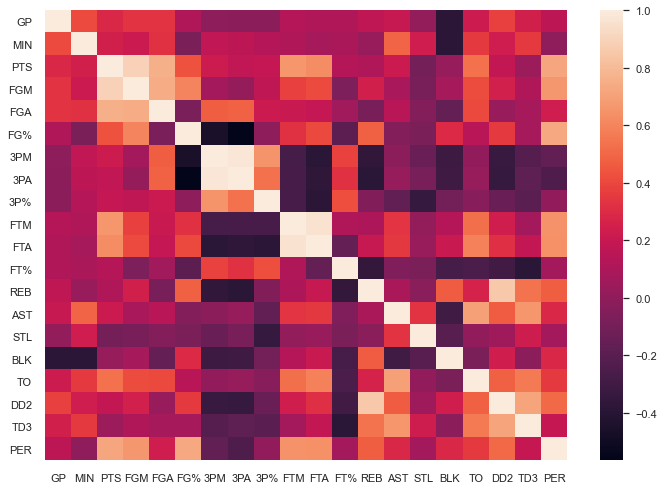

In [174]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_cluster.corr())

In [175]:
#dropping highly correlated features
df_cluster = df_cluster.drop(columns = ['FGM','3PM','FTM'])

In [176]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_scaled =scaler.fit_transform(df_cluster) #scaled

In [177]:
df_scaled

array([[ 7.63893725e-01,  1.29168043e-01,  2.57590179e+00,
         2.14999832e+00,  1.12853562e-01,  2.89915640e+00,
         1.22301064e+00,  4.37146857e-01,  1.26493768e+00,
        -3.67471188e-01,  2.14988223e-01,  3.89634875e-01,
        -1.35630111e+00,  8.93153004e-01, -4.47174750e-01,
        -3.64362606e-01,  1.26152258e+00],
       [ 4.83737102e-01,  1.21689893e+00,  2.36000964e+00,
         2.85438285e+00,  1.83682158e-01,  8.65419822e-02,
        -3.49431612e-01,  1.17628406e+00,  8.90120766e-01,
        -6.85628061e-01, -4.59862702e-01,  3.89634875e-01,
        -5.15618605e-01,  5.07063809e-01, -7.05657265e-01,
        -3.64362606e-01,  3.74950331e-01],
       [ 1.13743589e+00,  1.21689893e+00,  1.58896624e+00,
         1.17469666e+00, -6.19041926e-01,  1.94719460e+00,
         5.67826370e-01,  9.12306485e-01,  1.43152298e+00,
        -8.84476106e-01,  1.03445006e+00, -6.35720059e-01,
        -7.95846107e-01,  3.78367411e-01,  6.97902789e-02,
        -3.64362606e-01,  1.0

In [178]:
K = range(1,10)
kmeans = [KMeans(n_clusters=k) for k in K]
score = [kmeans[k].fit(df_cluster).score(df_cluster) for k in range(len(kmeans))]

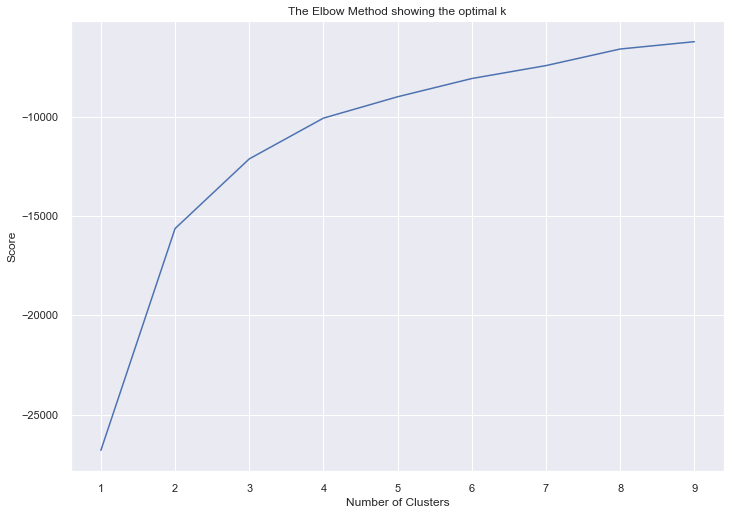

In [179]:
plt.plot(K, score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

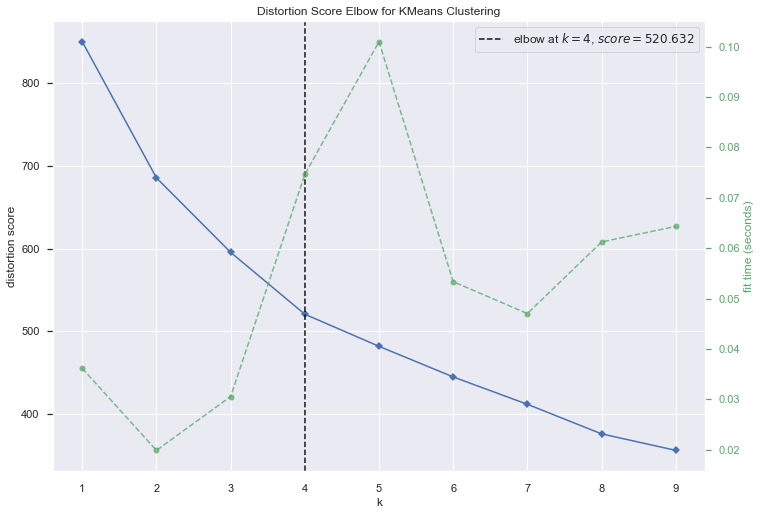

In [180]:
# alternative visualization method
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

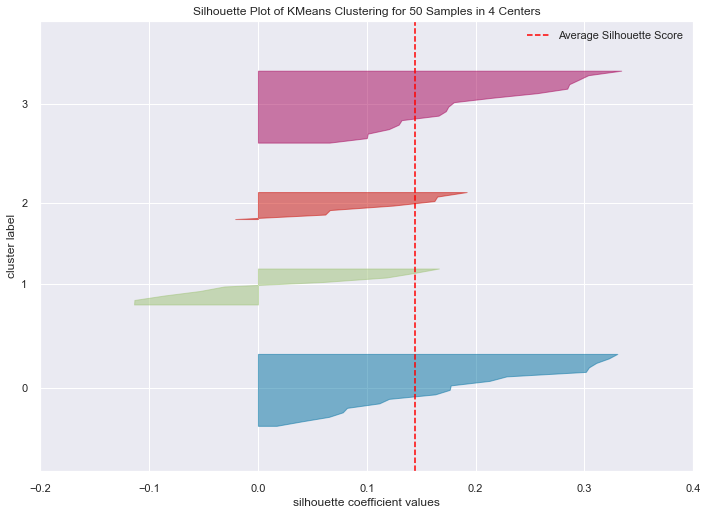

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [181]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer


model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data

----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.17522922022062132


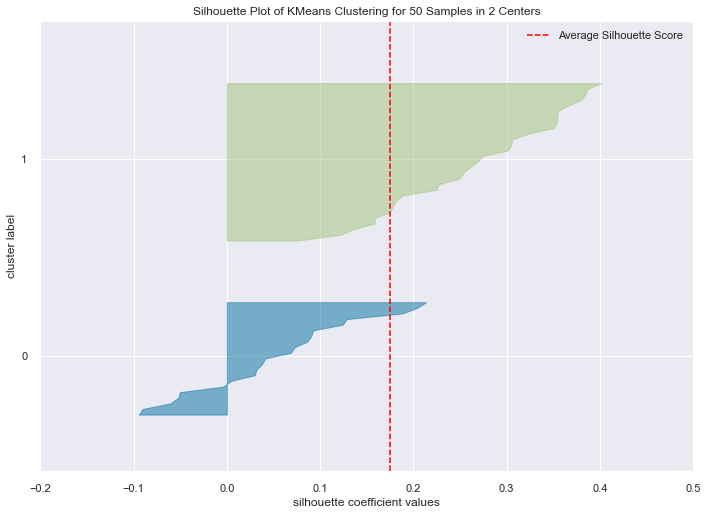

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.13644113760015034


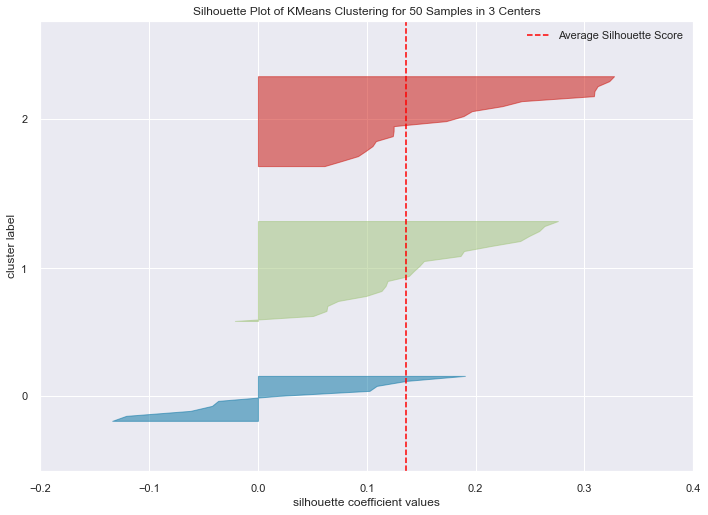

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.14398254660253207


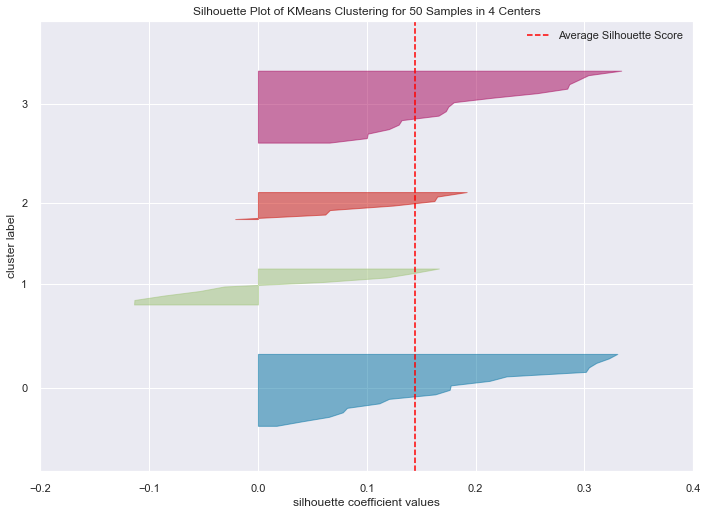

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.14998566518287165


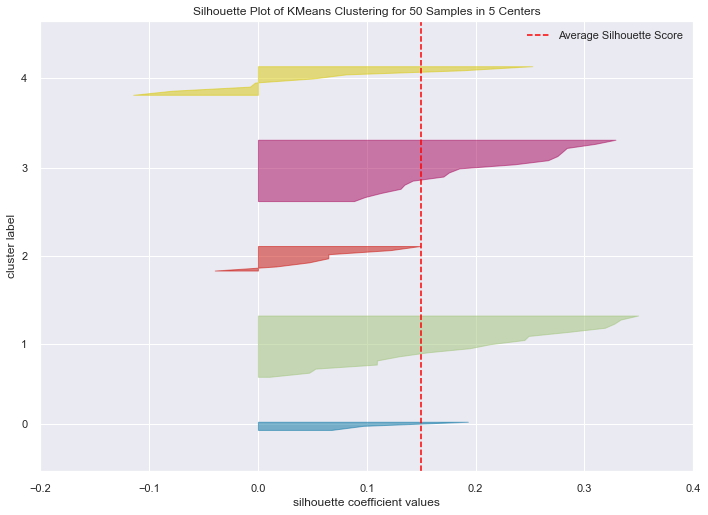

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.10815886321453265


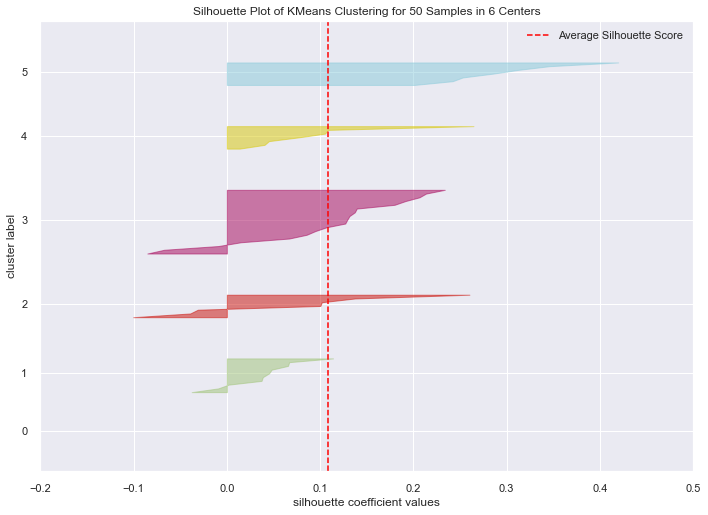

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.14978163289917334


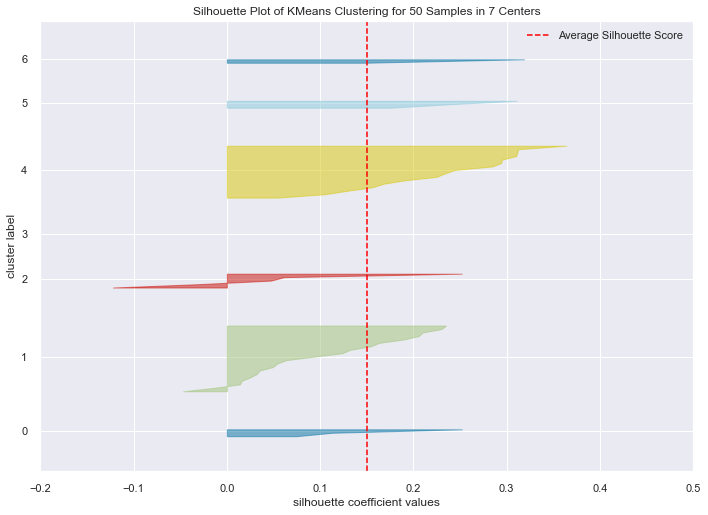

In [182]:
from sklearn.metrics import silhouette_score
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(df_scaled)
    
    silhouette_avg = silhouette_score(df_scaled, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(df_scaled)        # Fit the data to the visualizer
    visualizer.poof()

## From the elbow method, use Kmeans with k = 4

In [183]:
'''use the best K from elbow method'''
model = KMeans(
        n_clusters=4,
        init='k-means++',
        n_jobs=-1,
        random_state=1)

model = model.fit(df_cluster)

y = model.predict(df_cluster)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



In [184]:
'''make an instance of the Model, either set n.comps or target variance'''
from sklearn.decomposition import PCA

#pca = PCA(n_components=3)
pca_80 = PCA(0.8)

'''fit PCA on dataset.'''
principalComponents_80 = pca_80.fit_transform(df_cluster)

'''print number of components'''
print("n.comps:", pca_80.n_components_)

principal80_df = pd.DataFrame(data = principalComponents_80)

n.comps: 3


In [185]:
principal80_df.head()

,0,1,2
0,-4.688657,-14.382895,-7.658036
1,-8.685349,-10.575202,-1.688706
2,3.141491,-16.065936,-6.850659
3,13.901729,5.420844,-12.314475
4,30.847798,7.291058,5.056635


In [186]:
pca_80.explained_variance_ratio_

array([0.56500149, 0.19042638, 0.09031657])

In [187]:
'''create df out of y'''
y_df = pd.DataFrame(y)

'''rename y col'''
y_df.rename(columns = {0:"Cluster"}, inplace=True)

'''link back the predicted array to initial dataframe'''
pad_pca_df = pd.concat([principal80_df, y_df], axis=1)

In [188]:
'''rename columns'''
pad_pca_df.rename(columns = {0 : "PCA1", 1: "PCA2", 2: "PCA3"}, inplace=True)

In [189]:
pad_pca_df.head()

,PCA1,PCA2,PCA3,Cluster
0,-4.688657,-14.382895,-7.658036,0
1,-8.685349,-10.575202,-1.688706,0
2,3.141491,-16.065936,-6.850659,0
3,13.901729,5.420844,-12.314475,3
4,30.847798,7.291058,5.056635,2


## Correlation vs original features


In [190]:
'''merge orig.features with PCA'''
feat_pca_df = pd.merge(df_cluster,principal80_df, left_index=True, right_index=True)

'''rename columns'''
feat_pca_df.rename(columns = {0 : "PCA1", 1: "PCA2", 2: "PCA3"}, inplace=True)


feat_pca_df.head(3)

,GP,MIN,PTS,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER,PCA1,PCA2,PCA3
0,63,34.2,32.0,21.7,48.2,12.7,42.1,6.3,91.6,5.5,5.8,1.2,0.1,3.4,8,0,26.37,-4.688657,-14.382895,-7.658036
1,60,35.8,31.3,23.0,48.5,6.2,34.9,7.7,88.9,4.7,4.4,1.2,0.4,3.1,4,0,22.81,-8.685349,-10.575202,-1.688706
2,67,35.8,28.8,19.9,45.1,10.5,39.1,7.2,92.8,4.2,7.5,0.9,0.3,3.0,16,0,25.65,3.141491,-16.065936,-6.850659


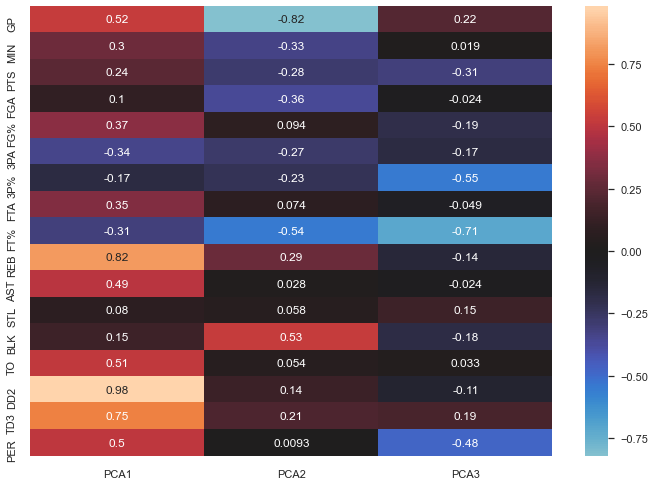

In [191]:
import seaborn as sns

'''calc corr'''
feat_pca_r = feat_pca_df.corr()
feat_pca_r = feat_pca_r[feat_pca_r.columns[-3:]]
feat_pca_r = feat_pca_r[:-3]

'''draw heatmap'''
sns.heatmap(feat_pca_r, center = 0, annot = True)
None

In [192]:
pad_pca_df.shape

(50, 4)

In [193]:
#Create a new df with Name and Pos
df_1 = pd.DataFrame({'Name':df['Name'], 'POS':df['POS']})

In [194]:
df_1.head()

,Name,POS
0,Stephen Curry,PG
1,Bradley Beal,SG
2,Damian Lillard,PG
3,Joel Embiid,C
4,Giannis Antetokounmpo,PF


In [195]:
df_2 = df_1.merge(df_cluster,how = 'inner', left_index = True, right_index = True)

In [196]:
df_2.head()

,Name,POS,GP,MIN,PTS,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER
0,Stephen Curry,PG,63,34.2,32.0,21.7,48.2,12.7,42.1,6.3,91.6,5.5,5.8,1.2,0.1,3.4,8,0,26.37
1,Bradley Beal,SG,60,35.8,31.3,23.0,48.5,6.2,34.9,7.7,88.9,4.7,4.4,1.2,0.4,3.1,4,0,22.81
2,Damian Lillard,PG,67,35.8,28.8,19.9,45.1,10.5,39.1,7.2,92.8,4.2,7.5,0.9,0.3,3.0,16,0,25.65
3,Joel Embiid,C,51,31.1,28.5,17.6,51.3,3.0,37.7,10.7,85.9,10.6,2.8,1.0,1.4,3.1,31,0,30.32
4,Giannis Antetokounmpo,PF,61,33.0,28.1,18.0,56.9,3.6,30.3,9.5,68.5,11.0,5.9,1.2,1.2,3.4,41,7,29.24


In [197]:
final_df = pd.merge(pad_pca_df, df_2, how = "inner", left_index=True, right_index=True)

In [198]:
final_df.head()

,PCA1,PCA2,PCA3,Cluster,Name,POS,GP,MIN,PTS,FGA,...,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER
0,-4.688657,-14.382895,-7.658036,0,Stephen Curry,PG,63,34.2,32.0,21.7,...,6.3,91.6,5.5,5.8,1.2,0.1,3.4,8,0,26.37
1,-8.685349,-10.575202,-1.688706,0,Bradley Beal,SG,60,35.8,31.3,23.0,...,7.7,88.9,4.7,4.4,1.2,0.4,3.1,4,0,22.81
2,3.141491,-16.065936,-6.850659,0,Damian Lillard,PG,67,35.8,28.8,19.9,...,7.2,92.8,4.2,7.5,0.9,0.3,3.0,16,0,25.65
3,13.901729,5.420844,-12.314475,3,Joel Embiid,C,51,31.1,28.5,17.6,...,10.7,85.9,10.6,2.8,1.0,1.4,3.1,31,0,30.32
4,30.847798,7.291058,5.056635,2,Giannis Antetokounmpo,PF,61,33.0,28.1,18.0,...,9.5,68.5,11.0,5.9,1.2,1.2,3.4,41,7,29.24


In [199]:
final_df = final_df[["PCA1", "PCA2",'PCA3',"Cluster", "Name"]]


In [200]:
final_df.head()

,PCA1,PCA2,PCA3,Cluster,Name
0,-4.688657,-14.382895,-7.658036,0,Stephen Curry
1,-8.685349,-10.575202,-1.688706,0,Bradley Beal
2,3.141491,-16.065936,-6.850659,0,Damian Lillard
3,13.901729,5.420844,-12.314475,3,Joel Embiid
4,30.847798,7.291058,5.056635,2,Giannis Antetokounmpo


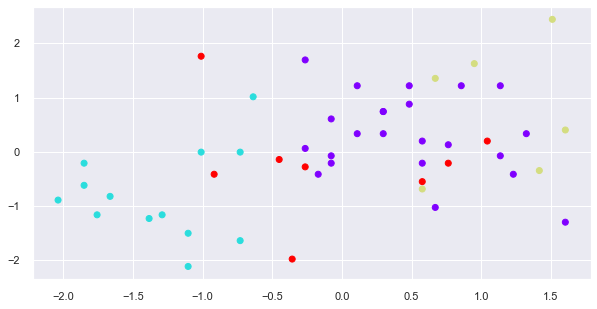

In [201]:
from matplotlib.pyplot import figure
figure(figsize = (10, 5))
plt.scatter(df_scaled[:,0],df_scaled[:,1], c = final_df['Cluster'], cmap = 'rainbow')

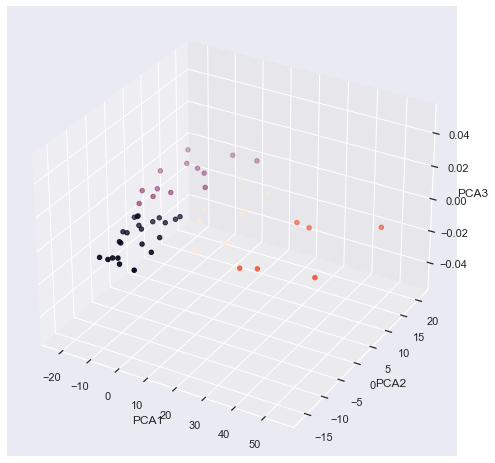

In [202]:
'''define top players'''
top_players = final_df.head(10)

'''3d plot - all data'''
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(final_df["PCA1"], final_df["PCA2"], c = final_df["Cluster"])

'''3d plot - top players'''
#ax.scatter(top_players["PCA1"], top_players["PCA2"], top_players["PCA3"], c = "red")

'''label name'''
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.show()

In [203]:
final_df[final_df['Cluster'] == 0 ]

,PCA1,PCA2,PCA3,Cluster,Name
0,-4.688657,-14.382895,-7.658036,0,Stephen Curry
1,-8.685349,-10.575202,-1.688706,0,Bradley Beal
2,3.141491,-16.065936,-6.850659,0,Damian Lillard
6,-10.288383,-7.656828,-1.121325,0,Zach LaVine
9,-7.739131,-5.699759,-9.150024,0,Kyrie Irving
10,2.065308,-10.628188,-1.352023,0,Jayson Tatum
11,-13.360615,-3.274842,-0.136067,0,Donovan Mitchell
13,-9.583615,-15.538334,5.306959,0,Devin Booker
15,-1.548157,0.215543,11.116923,0,De'Aaron Fox
17,-6.625286,-1.594754,-7.378876,0,Kawhi Leonard


In [204]:
final_df[final_df['Cluster'] == 1 ]

,PCA1,PCA2,PCA3,Cluster,Name
8,-9.209584,13.423603,-16.371875,1,Kevin Durant
24,-17.195300,14.753469,-5.263163,1,Shai Gilgeous-Alexander
27,-15.235898,3.408077,0.143859,1,CJ McCollum
30,-7.367353,20.550889,4.025723,1,Anthony Davis
34,-16.574133,0.548075,-2.810765,1,Jamal Murray
36,1.099540,20.820140,8.117697,1,Christian Wood
37,-12.651517,14.262648,7.009227,1,John Wall
41,-11.782113,5.747078,3.547177,1,Caris LeVert
42,-4.222528,9.657278,-6.898345,1,Kristaps Porzingis
43,-21.560957,18.587780,5.716507,1,Victor Oladipo


In [205]:
final_df[final_df['Cluster'] == 2 ]

,PCA1,PCA2,PCA3,Cluster,Name
4,30.847798,7.291058,5.056635,2,Giannis Antetokounmpo
12,50.807474,-5.041829,-11.095894,2,Nikola Jokic
22,29.223180,-8.108511,-0.342420,2,Julius Randle
25,33.896298,-7.017822,-5.950216,2,Nikola Vucevic
29,54.224200,12.227027,14.033010,2,Russell Westbrook
40,35.555048,6.828766,3.915161,2,Domantas Sabonis


In [206]:
final_df[final_df['Cluster'] == 3 ]

,PCA1,PCA2,PCA3,Cluster,Name
3,13.901729,5.420844,-12.314475,3,Joel Embiid
5,17.956601,-3.005463,8.188053,3,Luka Doncic
7,4.900063,0.523502,10.465178,3,Zion Williamson
14,12.755719,-7.192499,-4.722010,3,Trae Young
16,2.906298,14.528828,4.172068,3,LeBron James
18,13.881304,6.419634,-10.779497,3,Karl-Anthony Towns
20,14.448891,12.758210,-9.922980,3,James Harden
32,2.479157,3.735892,-0.899356,3,Jimmy Butler
